In [1]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import numpy as np
from elosports.elo import Elo
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pull HTML
response = requests.get('https://www.espn.com/nfl/schedule/_/week/3').text
soup = BeautifulSoup(response, 'html.parser')

# Pull Game Results
for item in soup.find_all('a', {'name':'&lpos=nfl:schedule:score'}):
    print(item.text)

MIA 31, JAX 13
CHI 30, ATL 26
BUF 35, LAR 32
CLE 34, WSH 20
TEN 31, MIN 30
NE 36, LV 20
SF 36, NYG 9
CIN 23, PHI 23 (OT)
PIT 28, HOU 21
IND 36, NYJ 7
CAR 21, LAC 16
TB 28, DEN 10
DET 26, ARI 23
SEA 38, DAL 31
GB 37, NO 30
KC 34, BAL 20


In [3]:
# Containers
game_container = []
week_container = []
year_container = []

# Scrape Data
for y in range (2002,2021):
    for i in range(1,18):
        url = 'https://www.espn.com/nfl/schedule/_/week/{week}/year/{year}'.format(week=i, year=y)

        response = requests.get(url).text
        soup = BeautifulSoup(response, 'html.parser')

        for game in soup.find_all('a', {'name':'&lpos=nfl:schedule:score'}):
            game_container.append(game.text)
            week_container.append(i)
            year_container.append(y)
        
        print('Year: ', str(y), ' , Game: ', str(i))
    

Year:  2002  , Game:  1
Year:  2002  , Game:  2
Year:  2002  , Game:  3
Year:  2002  , Game:  4
Year:  2002  , Game:  5
Year:  2002  , Game:  6
Year:  2002  , Game:  7
Year:  2002  , Game:  8
Year:  2002  , Game:  9
Year:  2002  , Game:  10
Year:  2002  , Game:  11
Year:  2002  , Game:  12
Year:  2002  , Game:  13
Year:  2002  , Game:  14
Year:  2002  , Game:  15
Year:  2002  , Game:  16
Year:  2002  , Game:  17
Year:  2003  , Game:  1
Year:  2003  , Game:  2
Year:  2003  , Game:  3
Year:  2003  , Game:  4
Year:  2003  , Game:  5
Year:  2003  , Game:  6
Year:  2003  , Game:  7
Year:  2003  , Game:  8
Year:  2003  , Game:  9
Year:  2003  , Game:  10
Year:  2003  , Game:  11
Year:  2003  , Game:  12
Year:  2003  , Game:  13
Year:  2003  , Game:  14
Year:  2003  , Game:  15
Year:  2003  , Game:  16
Year:  2003  , Game:  17
Year:  2004  , Game:  1
Year:  2004  , Game:  2
Year:  2004  , Game:  3
Year:  2004  , Game:  4
Year:  2004  , Game:  5
Year:  2004  , Game:  6
Year:  2004  , Game:  7


In [4]:
# Clean and Check
game_container = [x.replace(' (OT)', '') for x in game_container]

for i in zip(year_container, game_container, week_container):
    print(i)

(2002, 'SF 16, NYG 13', 1)
(2002, 'NYJ 37, BUF 31', 1)
(2002, 'CHI 27, MIN 23', 1)
(2002, 'SD 34, CIN 6', 1)
(2002, 'KC 40, CLE 39', 1)
(2002, 'GB 37, ATL 34', 1)
(2002, 'TEN 27, PHI 24', 1)
(2002, 'MIA 49, DET 21', 1)
(2002, 'WSH 31, ARI 23', 1)
(2002, 'CAR 10, BAL 7', 1)
(2002, 'IND 28, JAX 25', 1)
(2002, 'DEN 23, STL 16', 1)
(2002, 'OAK 31, SEA 17', 1)
(2002, 'NO 26, TB 20', 1)
(2002, 'HOU 19, DAL 10', 1)
(2002, 'NE 30, PIT 14', 1)
(2002, 'CHI 14, ATL 13', 2)
(2002, 'CLE 20, CIN 7', 2)
(2002, 'DAL 21, TEN 13', 2)
(2002, 'MIA 21, IND 13', 2)
(2002, 'JAX 23, KC 16', 2)
(2002, 'NO 35, GB 20', 2)
(2002, 'NE 44, NYJ 7', 2)
(2002, 'CAR 31, DET 7', 2)
(2002, 'TB 25, BAL 0', 2)
(2002, 'NYG 26, STL 21', 2)
(2002, 'ARI 24, SEA 13', 2)
(2002, 'BUF 45, MIN 39', 2)
(2002, 'SD 24, HOU 3', 2)
(2002, 'DEN 24, SF 14', 2)
(2002, 'OAK 30, PIT 17', 2)
(2002, 'PHI 37, WSH 7', 2)
(2002, 'NO 29, CHI 23', 3)
(2002, 'CLE 31, TEN 28', 3)
(2002, 'MIA 30, NYJ 3', 3)
(2002, 'CAR 21, MIN 14', 3)
(2002, 'NE 41, K

(2004, 'SD 23, OAK 17', 11)
(2004, 'SEA 24, MIA 17', 11)
(2004, 'ATL 14, NYG 10', 11)
(2004, 'PHI 28, WSH 6', 11)
(2004, 'GB 16, HOU 13', 11)
(2004, 'NE 27, KC 19', 11)
(2004, 'IND 41, DET 9', 12)
(2004, 'DAL 21, CHI 7', 12)
(2004, 'CIN 58, CLE 48', 12)
(2004, 'SD 34, KC 31', 12)
(2004, 'MIN 27, JAX 16', 12)
(2004, 'PHI 27, NYG 6', 12)
(2004, 'PIT 16, WSH 7', 12)
(2004, 'CAR 21, TB 14', 12)
(2004, 'HOU 31, TEN 21', 12)
(2004, 'ATL 24, NO 21', 12)
(2004, 'NE 24, BAL 3', 12)
(2004, 'NYJ 13, ARI 3', 12)
(2004, 'MIA 24, SF 17', 12)
(2004, 'BUF 38, SEA 9', 12)
(2004, 'OAK 25, DEN 24', 12)
(2004, 'GB 45, STL 17', 12)
(2004, 'CHI 24, MIN 14', 13)
(2004, 'NE 42, CLE 15', 13)
(2004, 'DET 26, ARI 12', 13)
(2004, 'IND 51, TEN 24', 13)
(2004, 'STL 16, SF 6', 13)
(2004, 'BUF 42, MIA 32', 13)
(2004, 'CAR 32, NO 21', 13)
(2004, 'NYJ 29, HOU 7', 13)
(2004, 'TB 27, ATL 0', 13)
(2004, 'CIN 27, BAL 26', 13)
(2004, 'KC 34, OAK 27', 13)
(2004, 'SD 20, DEN 17', 13)
(2004, 'PHI 47, GB 17', 13)
(2004, 'WSH 31

(2011, 'PIT 24, CIN 17', 10)
(2011, 'STL 13, CLE 12', 10)
(2011, 'DAL 44, BUF 7', 10)
(2011, 'JAX 17, IND 3', 10)
(2011, 'DEN 17, KC 10', 10)
(2011, 'MIA 20, WSH 9', 10)
(2011, 'ARI 21, PHI 17', 10)
(2011, 'HOU 37, TB 9', 10)
(2011, 'TEN 30, CAR 3', 10)
(2011, 'SEA 22, BAL 17', 10)
(2011, 'CHI 37, DET 13', 10)
(2011, 'SF 27, NYG 20', 10)
(2011, 'NE 37, NYJ 16', 10)
(2011, 'GB 45, MIN 7', 10)
(2011, 'DEN 17, NYJ 13', 11)
(2011, 'CLE 14, JAX 10', 11)
(2011, 'DET 49, CAR 35', 11)
(2011, 'GB 35, TB 26', 11)
(2011, 'MIA 35, BUF 8', 11)
(2011, 'OAK 27, MIN 21', 11)
(2011, 'DAL 27, WSH 24', 11)
(2011, 'BAL 31, CIN 24', 11)
(2011, 'SEA 24, STL 7', 11)
(2011, 'SF 23, ARI 7', 11)
(2011, 'ATL 23, TEN 17', 11)
(2011, 'CHI 31, SD 20', 11)
(2011, 'PHI 17, NYG 10', 11)
(2011, 'NE 34, KC 3', 11)
(2011, 'GB 27, DET 15', 12)
(2011, 'DAL 20, MIA 19', 12)
(2011, 'BAL 16, SF 6', 12)
(2011, 'ATL 24, MIN 14', 12)
(2011, 'CIN 23, CLE 20', 12)
(2011, 'TEN 23, TB 17', 12)
(2011, 'CAR 27, IND 19', 12)
(2011, 'AR

(2015, 'PIT 33, CIN 20', 14)
(2015, 'CLE 24, SF 10', 14)
(2015, 'KC 10, SD 3', 14)
(2015, 'STL 21, DET 14', 14)
(2015, 'NYJ 30, TEN 8', 14)
(2015, 'PHI 23, BUF 20', 14)
(2015, 'NO 24, TB 17', 14)
(2015, 'CAR 38, ATL 0', 14)
(2015, 'JAX 51, IND 16', 14)
(2015, 'SEA 35, BAL 6', 14)
(2015, 'OAK 15, DEN 12', 14)
(2015, 'GB 28, DAL 7', 14)
(2015, 'NE 27, HOU 6', 14)
(2015, 'NYG 31, MIA 24', 14)
(2015, 'STL 31, TB 23', 15)
(2015, 'NYJ 19, DAL 16', 15)
(2015, 'HOU 16, IND 10', 15)
(2015, 'MIN 38, CHI 17', 15)
(2015, 'NE 33, TEN 16', 15)
(2015, 'CAR 38, NYG 35', 15)
(2015, 'WSH 35, BUF 25', 15)
(2015, 'ATL 23, JAX 17', 15)
(2015, 'KC 34, BAL 14', 15)
(2015, 'GB 30, OAK 20', 15)
(2015, 'SEA 30, CLE 13', 15)
(2015, 'PIT 34, DEN 27', 15)
(2015, 'SD 30, MIA 14', 15)
(2015, 'CIN 24, SF 14', 15)
(2015, 'ARI 40, PHI 17', 15)
(2015, 'DET 35, NO 27', 15)
(2015, 'OAK 23, SD 20', 16)
(2015, 'WSH 38, PHI 24', 16)
(2015, 'ATL 20, CAR 13', 16)
(2015, 'BUF 16, DAL 6', 16)
(2015, 'DET 32, SF 17', 16)
(2015, '

In [5]:
# Grab winners and score from raw
winners = [x.split(', ')[0] if x != 'Postponed' else np.nan for x in game_container]
winner_names = [x.split(' ')[0] if pd.notnull(x) else np.nan for x in winners]
winner_scores = [x.split(' ')[1] if pd.notnull(x) else np.nan for x in winners]

# Grab losers and score from raw 
losers = [x.split(', ')[1] if x != 'Postponed' else np.nan for x in game_container]
loser_names = [x.split(' ')[0] if pd.notnull(x) else np.nan for x in losers]
loser_scores = [x.split(' ')[1] if pd.notnull(x) else np.nan for x in losers]


In [6]:
# Dictionary of lists  
dict = {'year_num': year_container,
        'week_num': week_container,
        'raw_data': game_container,
        'winner_name': winner_names,
        'winner_score': winner_scores,
        'loser_name': loser_names,
        'loser_score': loser_scores}  

# Create dataframe
df = pd.DataFrame(dict)


# Change Types and add column
df['winner_score'] = pd.to_numeric(df['winner_score'])
df['loser_score'] = pd.to_numeric(df['loser_score'])
df['is_tie'] = df.winner_score == df.loser_score

# Map team names
df.replace({'STL':'LAR',
            'OAK':'LV',
            'SD':'LAC'},
           inplace=True)

# Drop nulls
df.dropna(inplace=True)

# Check for the chiefs
df[(df.winner_name == 'KC') | (df.loser_name == 'KC')]

# Save
df.to_csv('nfl_games_all.csv')

In [7]:
df2020 = df[df.year_num == 2020]
df2020.head()

,year_num,week_num,raw_data,winner_name,winner_score,loser_name,loser_score,is_tie
4610,2020,1,"KC 34, HOU 20",KC,34.0,HOU,20.0,False
4611,2020,1,"SEA 38, ATL 25",SEA,38.0,ATL,25.0,False
4612,2020,1,"BUF 27, NYJ 17",BUF,27.0,NYJ,17.0,False
4613,2020,1,"CHI 27, DET 23",CHI,27.0,DET,23.0,False
4614,2020,1,"GB 43, MIN 34",GB,43.0,MIN,34.0,False


In [61]:
############### TEST ####################
# Instantiate League
eloLeague = Elo(k = 100) 

# Add Players
for name in set(df['winner_name']):
    eloLeague.addPlayer(name, rating = 1200)

for row in df2020.iterrows():
    eloLeague.gameOver(winner=row[1]['winner_name'], loser=row[1]['loser_name'], winnerHome=0)


In [62]:
for name in set(df['winner_name']):
    print(name, eloLeague.ratingDict[name])

TB 1279.5539504757958
NYJ 786.7748140575363
NE 1187.6917758536727
ATL 1226.0284754344468
DET 1000.9836971919068
GB 1249.8295059849993
KC 1519.091315303166
HOU 1166.2275185406888
SEA 1328.1958646987973
BUF 1352.2661720990054
ARI 1193.6402685412104
NYG 1166.7170909786325
LAC 1003.8422025098961
WSH 1083.731990152815
DAL 983.5082069821191
PHI 1050.9245579286273
BAL 1237.661096875473
PIT 1573.737521716078
CLE 1346.845709834421
NO 1492.361740611544
LAR 1381.7084002846248
CHI 1120.1715904291755
CAR 1045.2371484270268
IND 1343.4055357526954
TEN 1417.023254977669
SF 1111.371979147653
CIN 1000.1580127198331
LV 1235.2827619287136
MIA 1306.4681215486728
JAX 820.9622843069716
MIN 1205.7920098438876
DEN 1182.8054248622448


In [82]:
# Containers 
week_container = []
year_container = []
name_container = []
elo_container = []
teams = set(df['winner_name'])

# Instantiate League
eloLeague = Elo(k = 10) 

# Add Players
for name in set(df['winner_name']):
    eloLeague.addPlayer(name, rating = 1200)

for y in range (2002,2021):
    for w in range(1,18):
        
        # Subset to the week and year
        loop_df = df[(df.year_num == y) & (df.week_num == w) & (df.is_tie == False)]
        
        # Play games of the week
        for row in loop_df.iterrows():
            eloLeague.gameOver(winner=row[1]['winner_name'], loser=row[1]['loser_name'], winnerHome=0)
            
        # Get new Elos
        for name in teams:
            elo_container.append(eloLeague.ratingDict[name])
            name_container.append(name)
            week_container.append(w)
            year_container.append(y)
            
            
              

In [79]:
# dictionary of lists  
dict = {'year_num': year_container,
        'week_num': week_container,
        'year_week':[str(x) + '-' + str(y) for x,y in zip(year_container, week_container)],
        'team': name_container,
        'elo': elo_container
       }  
    
elos_df = pd.DataFrame(dict)

In [80]:
pats_df = elos_df[elos_df.team == 'NYG']
pats_df.reset_index(inplace=True)

sns.lineplot(x = pats_df.index, y=pats_df['elo'])


plt.show()

AttributeError: 'NoneType' object has no attribute 'seq'

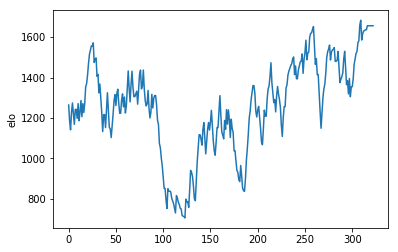

In [56]:
pats_df = elos_df[elos_df.team == 'KC']
pats_df.reset_index(inplace=True)


sns.lineplot(x = pats_df.index, y=pats_df['elo'])
plt.show()

In [71]:
elos_df[(elos_df.year_num == 2020) & (elos_df.week_num == 11)].sort_values('elo', ascending=False)

,year_num,week_num,team,elo
10114,2020,11,NE,1418.948472
10129,2020,11,PIT,1368.935554
10118,2020,11,KC,1360.409485
10131,2020,11,NO,1350.601697
10120,2020,11,SEA,1323.553481
10128,2020,11,BAL,1315.630578
10117,2020,11,GB,1309.554834
10142,2020,11,MIN,1247.497101
10127,2020,11,PHI,1238.572364
10135,2020,11,IND,1236.948198


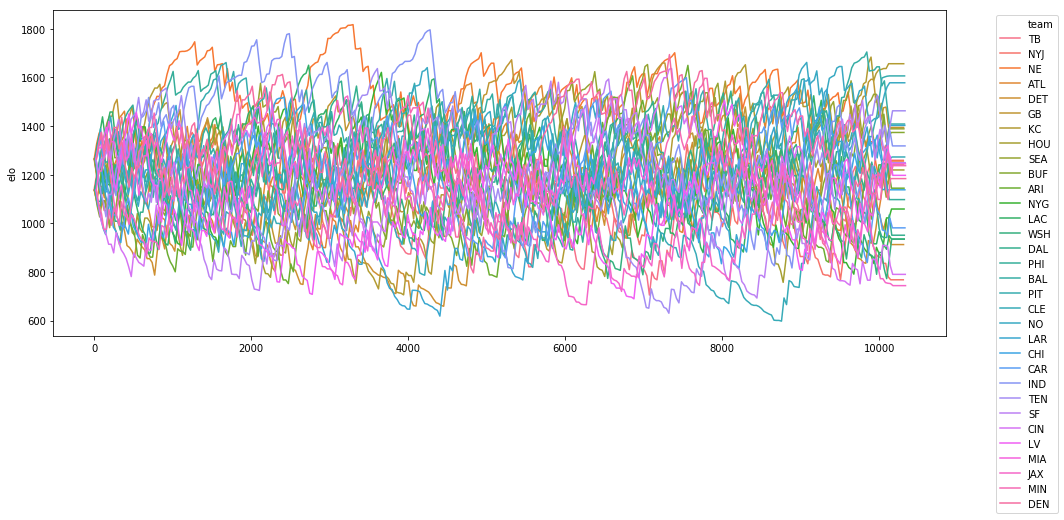

In [58]:
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.lineplot(x=range(len(elos_df)), y='elo', data=elos_df, hue='team')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()